MACHINE LEARNING

In [9]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

1. DECISION MAKING: WHICH DS IS THE BEST?

In [10]:
# TRAIN DFs
X_train_with_outliers_sel = pd.read_csv('../data/processed/X_train_with_outliers_sel.csv')
X_train_without_outliers_sel = pd.read_csv('../data/processed/X_train_without_outliers_sel.csv')
X_train_with_outliers_norm_sel = pd.read_csv('../data/processed/X_train_with_outliers_norm_sel.csv')
X_train_without_outliers_norm_sel = pd.read_csv('../data/processed/X_train_without_outliers_norm_sel.csv')
X_train_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_with_outliers_minmax_sel.csv')
X_train_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_without_outliers_minmax_sel.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')

# TEST DFs
X_test_with_outliers_sel = pd.read_csv('../data/processed/X_test_with_outliers_sel.csv')
X_test_without_outliers_sel = pd.read_csv('../data/processed/X_test_without_outliers_sel.csv')
X_test_with_outliers_norm_sel = pd.read_csv('../data/processed/X_test_with_outliers_norm_sel.csv')
X_test_without_outliers_norm_sel = pd.read_csv('../data/processed/X_test_without_outliers_norm_sel.csv')
X_test_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_with_outliers_minmax_sel.csv')
X_test_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_without_outliers_minmax_sel.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

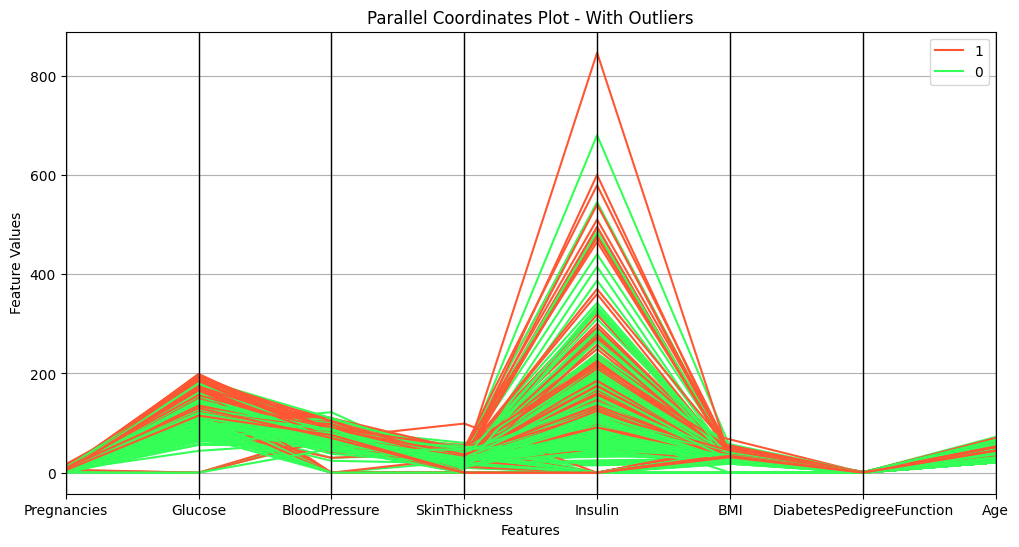

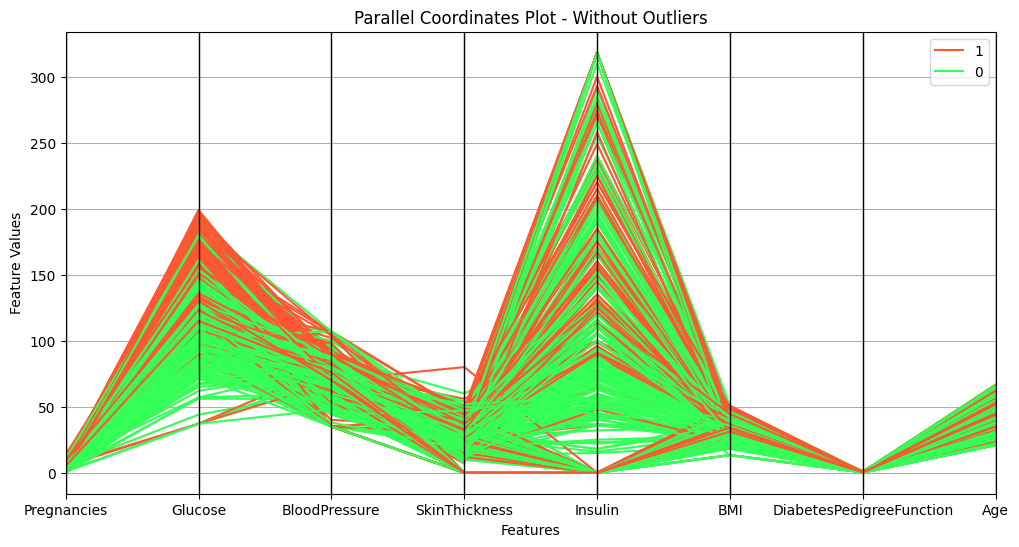

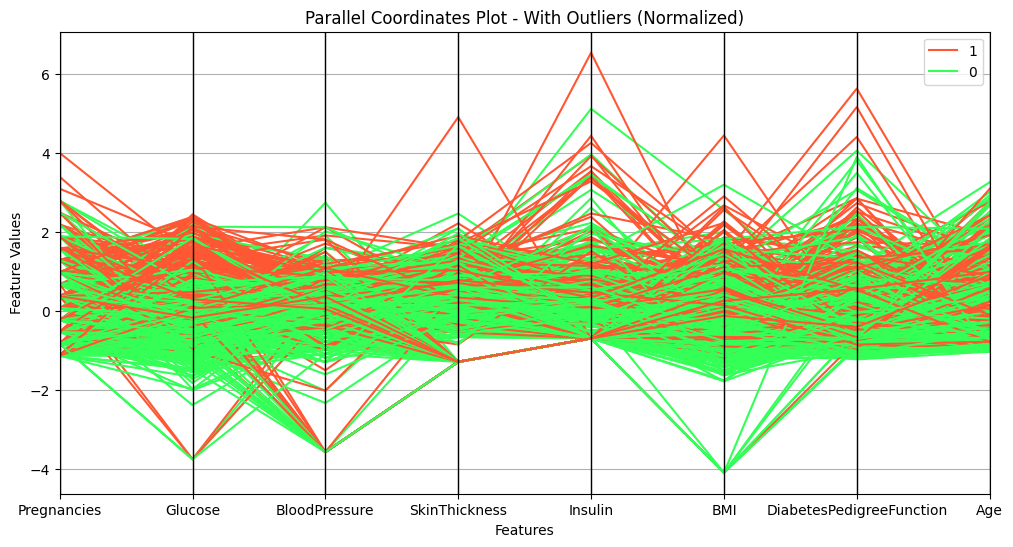

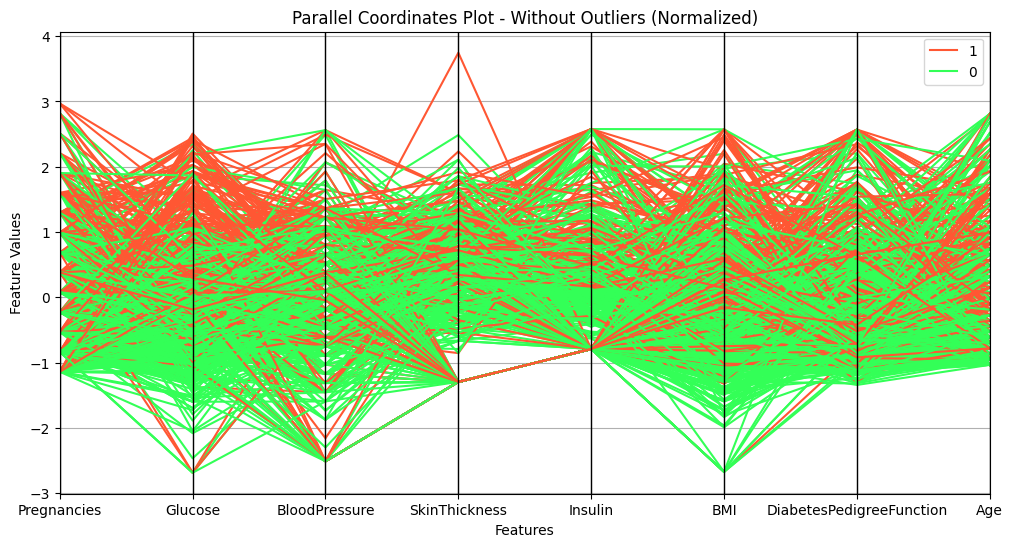

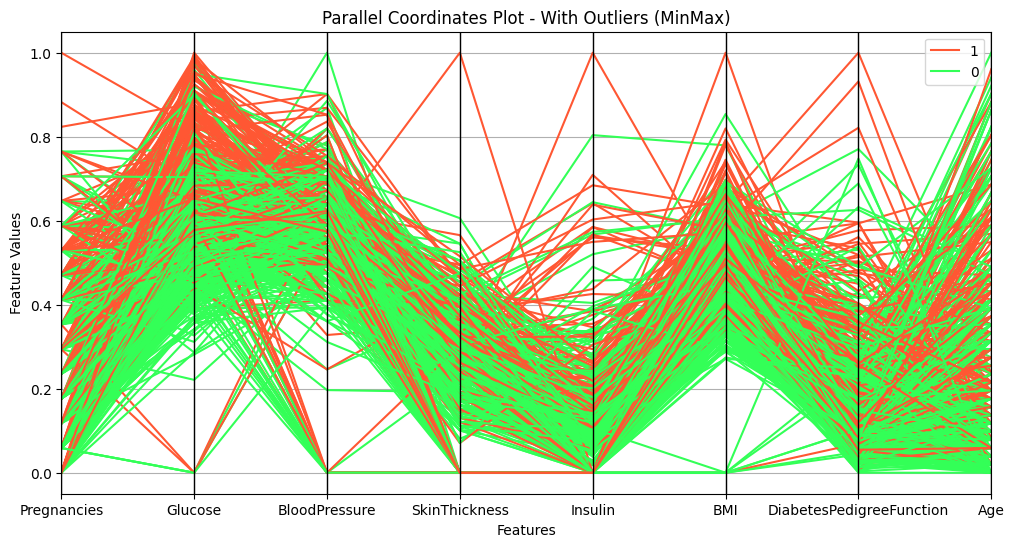

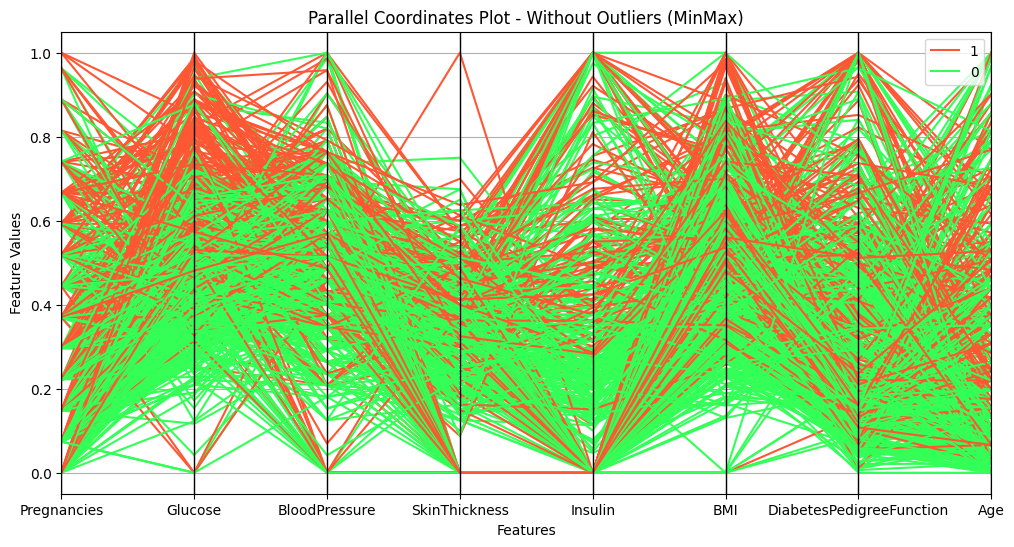

In [12]:
datasets = {
    "With Outliers": (X_train_with_outliers_sel, X_test_with_outliers_sel),
    "Without Outliers": (X_train_without_outliers_sel, X_test_without_outliers_sel),
    "With Outliers (Normalized)": (X_train_with_outliers_norm_sel, X_test_with_outliers_norm_sel),
    "Without Outliers (Normalized)": (X_train_without_outliers_norm_sel, X_test_without_outliers_norm_sel),
    "With Outliers (MinMax)": (X_train_with_outliers_minmax_sel, X_test_with_outliers_minmax_sel),
    "Without Outliers (MinMax)": (X_train_without_outliers_minmax_sel, X_test_without_outliers_minmax_sel)
}

y_train = pd.read_csv('../data/processed/y_train.csv')
y_train.columns = ['Outcome']
y_train.reset_index(drop=True, inplace=True)

for name, (X_train, X_test) in datasets.items():
    X_train.reset_index(drop=True, inplace=True)

    df = pd.concat([X_train, y_train], axis=1)

    plt.figure(figsize=(12, 6))
    pd.plotting.parallel_coordinates(
        df, 
        "Outcome", 
        color=["#FF5733", "#33FF57", "#3357FF"]  # Adjust colors for consistency
    )
    plt.title(f"Parallel Coordinates Plot - {name}")
    plt.ylabel("Feature Values")
    plt.xlabel("Features")
    plt.show()


In [21]:
datasets = {
    "With Outliers": (X_train_with_outliers_sel, X_test_with_outliers_sel),
    "Without Outliers": (X_train_without_outliers_sel, X_test_without_outliers_sel),
    "With Outliers (Normalized)": (X_train_with_outliers_norm_sel, X_test_with_outliers_norm_sel),
    "Without Outliers (Normalized)": (X_train_without_outliers_norm_sel, X_test_without_outliers_norm_sel),
    "With Outliers (MinMax)": (X_train_with_outliers_minmax_sel, X_test_with_outliers_minmax_sel),
    "Without Outliers (MinMax)": (X_train_without_outliers_minmax_sel, X_test_without_outliers_minmax_sel)
}

y_train = y_train.values.ravel() if len(y_train.shape) > 1 else y_train
y_test = y_test.values.ravel() if len(y_test.shape) > 1 else y_test

# Prepare lists for results and models
results = []
models = []

# Iterate through datasets
for df_index, (name, (X_train, X_test)) in enumerate(datasets.items()):
    # Initialize the model
    model = DecisionTreeClassifier(random_state=42)
    
    # Fit the model on training data
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results.append({
        "Dataset": name,
        "Train Score": accuracy_score(y_train, y_train_pred),
        "Test Score": accuracy_score(y_test, y_test_pred)
    })
    models.append(model)

sorted_results = sorted(results, key=lambda x: x["Train Score"], reverse=True)

for result in sorted_results:
    print(f"Dataset: {result['Dataset']}")
    print(f"Train Score: {result['Train Score']:.4f}")
    print(f"Test Score: {result['Test Score']:.4f}")
    print("-" * 30)

Dataset: With Outliers
Train Score: 1.0000
Test Score: 0.6818
------------------------------
Dataset: Without Outliers
Train Score: 1.0000
Test Score: 0.6753
------------------------------
Dataset: With Outliers (Normalized)
Train Score: 1.0000
Test Score: 0.6883
------------------------------
Dataset: Without Outliers (Normalized)
Train Score: 1.0000
Test Score: 0.6753
------------------------------
Dataset: With Outliers (MinMax)
Train Score: 1.0000
Test Score: 0.6883
------------------------------
Dataset: Without Outliers (MinMax)
Train Score: 1.0000
Test Score: 0.6753
------------------------------


In [23]:
sorted_results = sorted(results, key=lambda x: x["Test Score"], reverse=True)

for result in sorted_results:
    print(f"Dataset: {result['Dataset']}")
    print(f"Train Score: {result['Train Score']:.4f}")
    print(f"Test Score: {result['Test Score']:.4f}")
    print("-" * 30)

Dataset: With Outliers (Normalized)
Train Score: 1.0000
Test Score: 0.6883
------------------------------
Dataset: With Outliers (MinMax)
Train Score: 1.0000
Test Score: 0.6883
------------------------------
Dataset: With Outliers
Train Score: 1.0000
Test Score: 0.6818
------------------------------
Dataset: Without Outliers
Train Score: 1.0000
Test Score: 0.6753
------------------------------
Dataset: Without Outliers (Normalized)
Train Score: 1.0000
Test Score: 0.6753
------------------------------
Dataset: Without Outliers (MinMax)
Train Score: 1.0000
Test Score: 0.6753
------------------------------


Observations: 
- The best datasets are 'X_train_with_outliers_norm_sel' & 'X_train_with_outliers_minmax_sel'

2. DECISION TREE

In [24]:
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
tree_rules = export_text(model, feature_names = columns)
print(tree_rules)

|--- Glucose <= 0.66
|   |--- BMI <= 0.35
|   |   |--- Glucose <= 0.54
|   |   |   |--- DiabetesPedigreeFunction <= 0.53
|   |   |   |   |--- class: 0
|   |   |   |--- DiabetesPedigreeFunction >  0.53
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.56
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DiabetesPedigreeFunction >  0.56
|   |   |   |   |   |--- class: 0
|   |   |--- Glucose >  0.54
|   |   |   |--- BloodPressure <= 0.29
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  0.29
|   |   |   |   |--- Age <= 0.69
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  0.69
|   |   |   |   |   |--- Pregnancies <= 0.52
|   |   |   |   |   |   |--- Pregnancies <= 0.33
|   |   |   |   |   |   |   |--- BMI <= 0.24
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- BMI >  0.24
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Pregnancies >  0.33
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |  

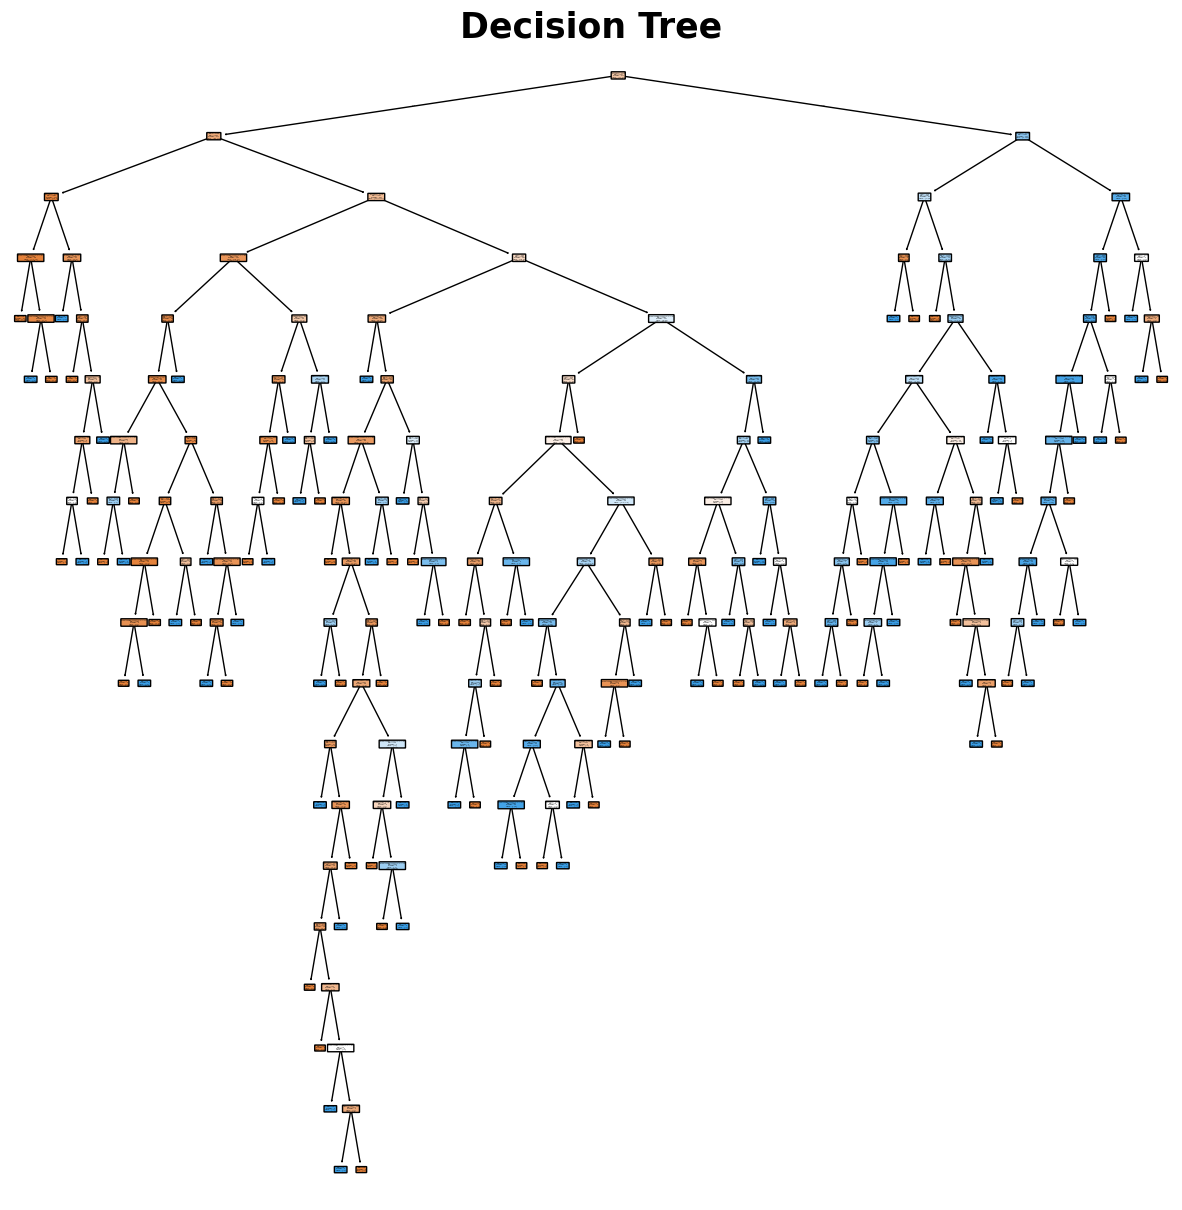

In [28]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_with_outliers_sel, y_train)

fig = plt.figure(figsize=(15, 15))
plot_tree(
    model,
    feature_names=list(X_train_with_outliers_sel.columns),  # Feature names
    class_names=["Sano", "Diabetes"],  # Class names
    filled=True,  # Add colors to nodes
    rounded=True  # Use rounded corners
)

plt.title("Decision Tree", fontsize=25, fontweight='bold')
plt.show()

In [30]:
best_model = models[0]
y_test_pred = best_model.predict(X_test_with_outliers_sel)
print(accuracy_score(y_test, y_test_pred))

0.7857142857142857


3. MODEL OPTIMIZATION

In [31]:
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 4, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [32]:
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=60, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 10]},
             scoring='accuracy')

In [33]:
grid.fit(X_train_with_outliers_sel, y_train)

print(f"The best hyperparameters are: {grid.best_params_}")

The best hyperparameters are: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [34]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train_with_outliers_sel, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       random_state=42)

In [35]:
best_model = models[0]
y_test_pred = best_model.predict(X_test_with_outliers_sel)
print(accuracy_score(y_test, y_test_pred))

0.7857142857142857


In [ ]:
dump(model, open("../models/tree_classifier_crit-entropy_maxdepth-10_min_leaf-4_min_split-2_42.sav", "wb"))

4. RANDOM FOREST

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Datasets dictionary
datasets = {
    "With Outliers": (X_train_with_outliers_sel, X_test_with_outliers_sel),
    "Without Outliers": (X_train_without_outliers_sel, X_test_without_outliers_sel),
    "With Outliers (Normalized)": (X_train_with_outliers_norm_sel, X_test_with_outliers_norm_sel),
    "Without Outliers (Normalized)": (X_train_without_outliers_norm_sel, X_test_without_outliers_norm_sel),
    "With Outliers (MinMax)": (X_train_with_outliers_minmax_sel, X_test_with_outliers_minmax_sel),
    "Without Outliers (MinMax)": (X_train_without_outliers_minmax_sel, X_test_without_outliers_minmax_sel)
}

# Load y_train and y_test
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel() if len(y_train.shape) > 1 else y_train
y_test = y_test.values.ravel() if len(y_test.shape) > 1 else y_test

# Initialize results and models
results = []
models = []

# Iterate over datasets
for df_index, (name, (X_train, X_test)) in enumerate(datasets.items()):
    # Initialize RandomForestClassifier
    model = RandomForestClassifier(random_state=42, n_estimators=60)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Append results
    results.append({
        "Dataset": name,
        "Train Score": accuracy_score(y_train, y_train_pred),
        "Test Score": accuracy_score(y_test, y_test_pred)
    })
    models.append(model)

# Sort results by training score in descending order
sorted_results = sorted(results, key=lambda x: x["Train Score"], reverse=True)

# Display the sorted results
for result in sorted_results:
    print(f"Dataset: {result['Dataset']}")
    print(f"Train Score: {result['Train Score']:.4f}")
    print(f"Test Score: {result['Test Score']:.4f}")
    print("-" * 30)


Dataset: With Outliers
Train Score: 1.0000
Test Score: 0.7857
------------------------------
Dataset: Without Outliers
Train Score: 1.0000
Test Score: 0.7792
------------------------------
Dataset: With Outliers (Normalized)
Train Score: 1.0000
Test Score: 0.7792
------------------------------
Dataset: Without Outliers (Normalized)
Train Score: 1.0000
Test Score: 0.7857
------------------------------
Dataset: With Outliers (MinMax)
Train Score: 1.0000
Test Score: 0.7857
------------------------------
Dataset: Without Outliers (MinMax)
Train Score: 1.0000
Test Score: 0.7662
------------------------------


In [36]:
best_model = models[0]
y_test_pred = best_model.predict(X_test_with_outliers_sel)
print(accuracy_score(y_test, y_test_pred))

0.7857142857142857
